In [41]:
#import necessary libraries

import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
#load mnnist dataset that's built into keras
(x_train, _), (x_test, _) = mnist.load_data()

#normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#reshape the train/test dataset 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [10]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [11]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [12]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
#choose loss function to try to minimize 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
#fitting to autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.2760 - val_loss: 0.1887
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1702 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1433 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1277 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1182 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1117 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1070 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1034 - val_loss: 0.1006
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1006 - val_loss: 0.0982
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0986 - val_loss: 0.0967

In [15]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


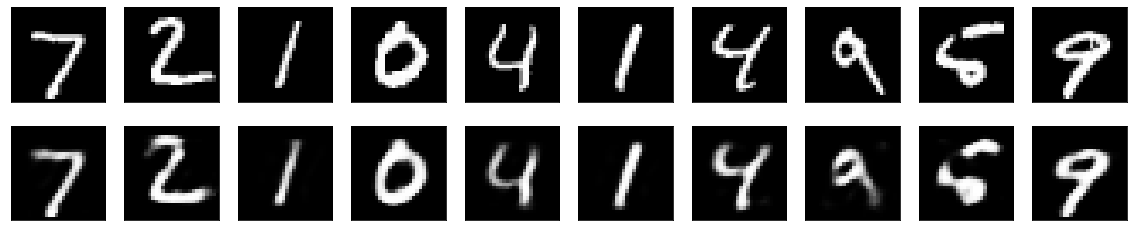

In [18]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#the following uses the simple autoencoder developed for mnist and directly applied to our dataset

In [129]:
#reading in the data and converting to pandas
df = pd.read_csv(r'comscore-activity-unscaled.csv')
matrix_df = df.to_numpy()
print(matrix_df.shape)

(4000, 170)


In [158]:
#splitting to train annd test dataset
train, test = train_test_split(matrix_df)
#obtaining only the first few and not X
xtrain = train[:,1:-1]/np.max(train[:,1:-2])
xtest = test[:,1:-1]/np.max(test[:,1:-2])
x_train = np.reshape(xtrain, (len(xtrain), 7, 24, 1))
x_test = np.reshape(xtest, (len(xtest), 7, 24, 1))


In [153]:
# This is the size of our encoded representations
encoding_dim = 7  # 7 floats -> compression of factor 24, assuming the input is 24*7 floats

# This is our input image
input_img = keras.Input(shape=(168,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(168, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (7-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
                epochs=20,
                batch_size = 256,
                shuffle=True,
                validation_data=(xtest, xtest))

Epoch 1/20
12/12 [==============================] - 0s 13ms/step - loss: 0.6904 - val_loss: 0.6869
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6835 - val_loss: 0.6792
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6745 - val_loss: 0.6695
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6626 - val_loss: 0.6568
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6467 - val_loss: 0.6405
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6265 - val_loss: 0.6204
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.6019 - val_loss: 0.5965
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5732 - val_loss: 0.5696
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5418 - val_loss: 0.5408
Epoch 10/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5094 - val_loss: 0.5114
Epoch 11/20
12/12 

In [154]:
#predicting
encodedimgs = encoder.predict(xtest)
decodedimgs = decoder.predict(encodedimgs)

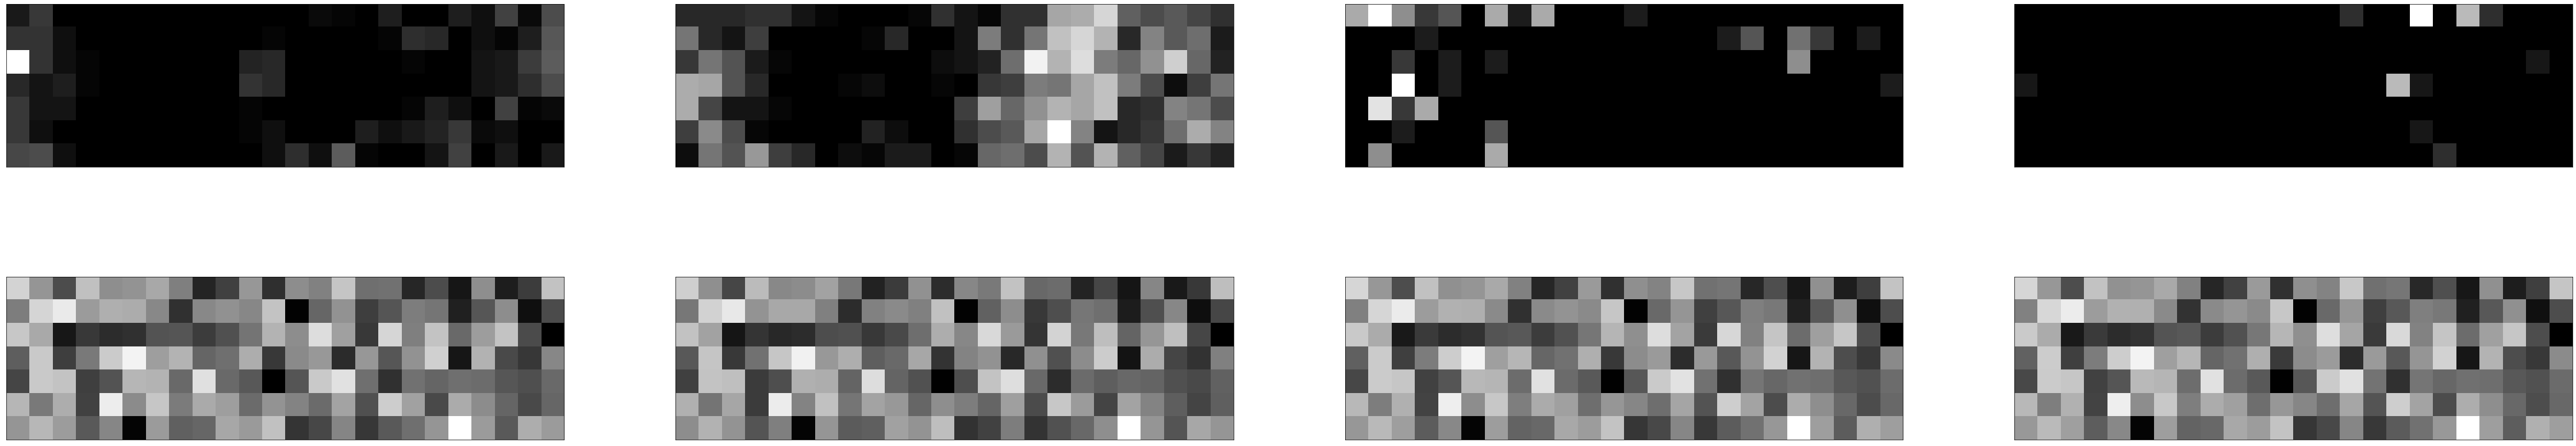

In [155]:
#plot predictios v. actual
n = 4  # How many we will display
plt.figure(figsize=(80, 16))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedimgs[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#the following blocks applies convoluted neural networks for the dataset

In [159]:

input_img = keras.Input(shape=(7, 24, 1))

conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #7 x 24 x 32
pool1 = layers.MaxPooling2D(pool_size=(1, 2))(conv1) #14 x 14 x 32
conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #7 x 12 x 64
pool2 = layers.MaxPooling2D(pool_size=(1, 2))(conv2) #7 x 7 x 64
conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 6 x 128 (small and thick)

#decoder
conv4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 6 x 128
up1 = layers.UpSampling2D((1,2))(conv4) # 7 x 12 x 128
conv5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
up2 = layers.UpSampling2D((1,2))(conv5) # 7 x 24 x 64
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 7 x 24 x 1



autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 7, 24, 1)]        0         
                                                                 
 conv2d_122 (Conv2D)         (None, 7, 24, 32)         320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 7, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_123 (Conv2D)         (None, 7, 12, 64)         18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_124 (Conv2D)         (None, 7, 6, 128)         738

In [160]:
autoencoder.fit(x_train, x_train, 
                batch_size=128,
                epochs=15,
                verbose=1,
                validation_data=(x_test, x_test))

Epoch 1/15
24/24 [==============================] - 7s 255ms/step - loss: 0.3029 - val_loss: 0.1095
Epoch 2/15
24/24 [==============================] - 5s 210ms/step - loss: 0.0714 - val_loss: 0.0900
Epoch 3/15
24/24 [==============================] - 6s 239ms/step - loss: 0.0530 - val_loss: 0.0734
Epoch 4/15
24/24 [==============================] - 4s 184ms/step - loss: 0.0478 - val_loss: 0.0674
Epoch 5/15
24/24 [==============================] - 4s 178ms/step - loss: 0.0443 - val_loss: 0.0633
Epoch 6/15
24/24 [==============================] - 5s 192ms/step - loss: 0.0410 - val_loss: 0.0599
Epoch 7/15
24/24 [==============================] - 5s 192ms/step - loss: 0.0390 - val_loss: 0.0583
Epoch 8/15
24/24 [==============================] - 4s 179ms/step - loss: 0.0382 - val_loss: 0.0574
Epoch 9/15
24/24 [==============================] - 6s 268ms/step - loss: 0.0375 - val_loss: 0.0562
Epoch 10/15
24/24 [==============================] - 7s 277ms/step - loss: 0.0369 - val_loss: 0.0557

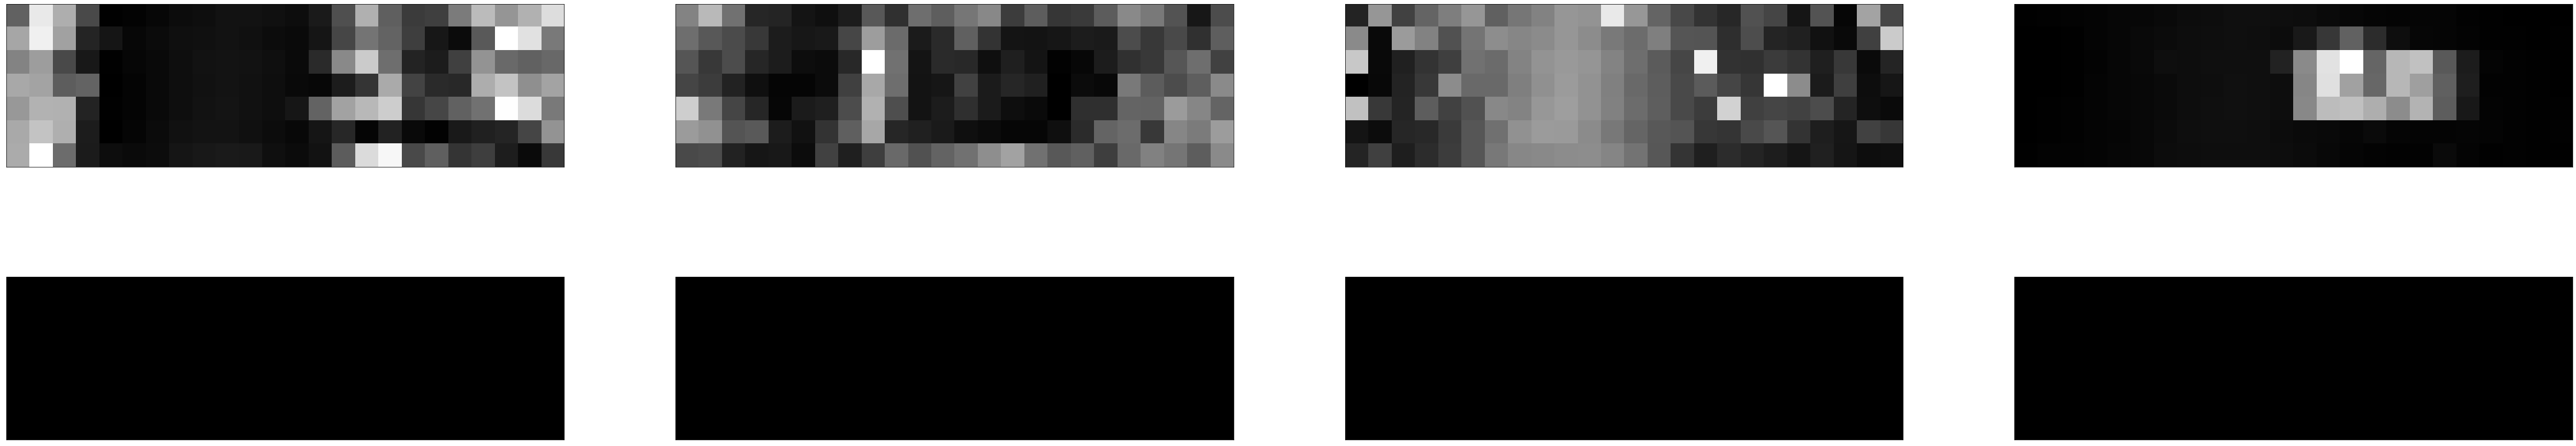

In [128]:
decoded_imgs = autoencoder.predict(x_test)

n = 4
plt.figure(figsize=(80, 16))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(7, 24))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
